In [3]:
import numpy as np
import matplotlib.pyplot as plt

First of all: we are going to introduce a dataset on that we apply our clustering method on:

In [4]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    epsilon = 0.1
    n = (np.random.rand(n_points,1)+epsilon) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise

    # hstack/vstack stacks data on top of each other (print shape to see what I mean)
    C_1 = np.hstack((d1x,d1y))
    C_2 = np.hstack((-d1x,-d1y))
    return np.vstack((C_1, C_2))

This is a dataset consisting of clusters twisting around each other. You don't need to understand the mathematics behind it, but you can play around with it if you like (make sure to train on the original dataset, not one you created)



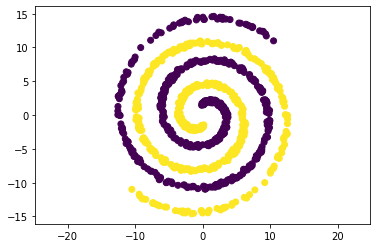

(1000, 2)


In [154]:
data_size = 500

dataset = twospirals(data_size)
labels = np.hstack((np.zeros(data_size),np.ones(data_size)))

# scatter makes a 2D scatter plot. Unfortunately you have to seperate the x-dim from the y-dim
# the labels are helpful for coloring. The algorithm does not use them, since this is unsupervised
plt.scatter(dataset[:,0], dataset[:,1], c = labels)
plt.axis('equal')
plt.show()

print(dataset.shape)

a) Implement the DBSCAN algorithm to classify points of the two clusters.

b) Plot a scatter plot highlighting the clusters that were found after finding good hyperparameter values eps and minPts.

c) Print accuracies for different data_size values.

d) For what kind of data_size values does the algorithm fail and why? What would you say are disadvantages of DBSCAN?

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

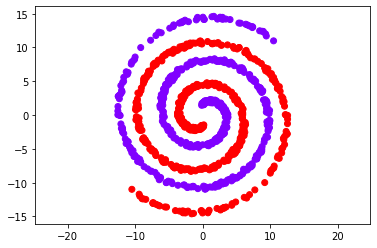

In [156]:
import sys 
  
# the setrecursionlimit function is 
# used to modify the default recursion 
# limit set by python. Using this,  
# we can increase the recursion limit 
# to satisfy our needs 
  
sys.setrecursionlimit(10**6) 

NOISE = -1
UNDEFINED = -2   
class DBSCAN:
    # labels:
    # -3 = undefined
    # -2 = noise
    # -1 = border
    def __init__(self, db, eps, minPts=4):
        # eps: the maximum distance between two samples for one to be considered as in the neighborhood of the other.
        self.eps = eps
        # minPts: The number of samples (or total weight) in a neighborhood for a point 
        # to be considered as a core point.
        self.minPts = minPts
        self.labels = np.full((len(db),), UNDEFINED)

    def calculate_accuracy(self, labels, predictions):
        # Accuracy refers to the closeness of a measured value to a standard or known value
        # Thus, we can call np.mean on our resulting boolean-valued array
        # to compute the number of correct predictions divided by the total number of predictions.
        return np.mean(labels == predictions)
    
    def euclidean_distance(self, x_1, x_2):
        return np.sqrt(np.sum((x_1-x_2)**2, axis=None))
    
    def range_query(self, db, pt): 
        n = []
        for i in range(len(db)):
            #  Compute distance and check epsilon
            if self.euclidean_distance(db[i], pt) <= self.eps:
                # Add to result - index of the point
                n.append(i)
        return n
        
    def predict(self, db):    
        cluster_count = 0  
        
        for p in range(len(db)):
            
            # if label was not visited
            if self.labels[p] != UNDEFINED:
                continue
            
            else:
                # Find neighbors
                neighbours = self.range_query(db, db[p])
                # Density check
                if len(neighbours) < self.minPts:
                    self.labels[p] = NOISE
                    continue

                else:
                    # next cluster label 
                    cluster_count = cluster_count + 1
                    # Label initial point
                    # Core point: A point with at least minPts within its neighbourhod
                    self.labels[p] = cluster_count
                    
                    # python copy list by value not by reference
                    
                    neighbours.remove(p)
                    
                    while len(neighbours) > 0:
                        iterated_neigbours = set()
                        for q in neighbours:
                                if self.labels[q] == NOISE:
                                    self.labels[q] = cluster_count
                                if self.labels[q] != UNDEFINED:
                                    continue
                                self.labels[q] = cluster_count

                                n2 = self.range_query(db, db[q])
                                if len(n2) >= self.minPts:
                                    iterated_neigbours.update(n2)
                        neighbours = iterated_neigbours

dbscan = DBSCAN(db=dataset, eps=1.9, minPts=3)
dbscan.predict(dataset)

print(dbscan.labels)
print(np.max(dbscan.labels))

plt.scatter(dataset[:,0], dataset[:,1], c = dbscan.labels, cmap="rainbow")
plt.axis('equal')
plt.show()

In [158]:
# because labels generated from the task description are marked with 0 and 1
# and the labels in the original algorithm should start with 1
# the simple numpy addition must be done to align labels   
accuracies = dbscan.calculate_accuracy(dbscan.labels, labels + 1)
print(accuracies)

1.0


* For what kind of data_size values does the algorithm fail and why? What would you say are disadvantages of DBSCAN?

The algorithm parameters must be adjusted after the new data was generated again. Because data was produced randomly, the previous parameters that gave 2 clusters can produce 3-4 clusters on the new spiral.
So that once it worked perfectly with eps=1.8, minPts=4 and for the new spiral they were changed to eps=1.9, minPts=3

if the eps-distance is big enough, so that the border can be reached more than one time, it will be assigned to the last cluster (in this implementation)

Distance metric used is Euclidean distance and the point from the another sub-spiral can be reached from the cluster of first sub-spiral despite that fact, that each sub-spiral representing different data

Large difference in density will give a new cluster. The increasing the eps-parameter will lead to wrong clustering so that different data points will be catched due the bigger distance.

The setting parameter correctly required the data preprocessing and understanding. On the given spirals it was possible to produce 1, 2, 3-5 and even 15-20 clusters just playing with parameters. In my opinion it could lead to overfitting problem: on the new data, generated randomly from the same source, instead of the perfectly predicted 2 clusters 3 or even 5 clusters will be found. That should be discussed in a class. 